# ===============================
## Rugby BI Project — Six Nations
## Analyse de l'évolution offensive du jeu (2000-2024)
# ===============================


In [149]:
# 📌 Import des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ===============================
## 1️. Chargement du dataset
# ===============================

In [150]:
df = pd.read_csv("/Users/celiamarty/Desktop/ETUDE RUGBY/rugby_six_nations.csv")

# ===============================
## 2. Aperçu approfondi du dataset
# ===============================

In [151]:
# 1️⃣ Informations générales
print("=== Informations générales ===")
df.info()
print("\n=== Dimensions ===")
df.shape

=== Informations générales ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       390 non-null    int64 
 1   Date       390 non-null    object
 2   HomeTeam   390 non-null    object
 3   HomeBonus  390 non-null    int64 
 4   AwayTeam   390 non-null    object
 5   AwayBonus  390 non-null    int64 
 6   HomeScore  390 non-null    int64 
 7   AwayScore  390 non-null    int64 
 8   Stadium    390 non-null    object
dtypes: int64(5), object(4)
memory usage: 27.5+ KB

=== Dimensions ===


(390, 9)

In [152]:
# 2️⃣ Aperçu rapide des premières lignes
print("\n=== 5 premières lignes ===")
df.head()


=== 5 premières lignes ===


,Year,Date,HomeTeam,HomeBonus,AwayTeam,AwayBonus,HomeScore,AwayScore,Stadium
0,2000,2000-02-05,Italy,0,Scotland,0,34,20,Stadio Flaminio
1,2000,2000-02-05,England,0,Ireland,0,50,18,Twickenham Stadium
2,2000,2000-02-05,Wales,0,France,0,3,36,Millennium Stadium
3,2000,2000-02-19,Wales,0,Italy,0,47,16,Millennium Stadium
4,2000,2000-02-19,France,0,England,0,9,15,Stade de France


In [153]:
# 3️⃣ Statistiques descriptives des colonnes numériques
print("\n=== Statistiques descriptives ===")
df.describe()


=== Statistiques descriptives ===


,Year,HomeBonus,AwayBonus,HomeScore,AwayScore
count,390.000000,390.000000,390.000000,390.000000,390.000000
mean,2012.500000,0.184615,0.166667,24.194872,20.353846
std,7.509634,0.449815,0.412425,12.441864,11.700984
min,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,0.000000,0.000000,16.000000,13.000000
50%,2012.500000,0.000000,0.000000,22.500000,18.000000
75%,2019.000000,0.000000,0.000000,31.000000,26.000000
max,2025.000000,4.000000,3.000000,80.000000,73.000000


In [154]:
# 4️⃣ Vérification des valeurs manquantes par colonne
print("\n=== Valeurs manquantes par colonne ===")
df.isnull().sum()


=== Valeurs manquantes par colonne ===


Year         0
Date         0
HomeTeam     0
HomeBonus    0
AwayTeam     0
AwayBonus    0
HomeScore    0
AwayScore    0
Stadium      0
dtype: int64

In [155]:
# 5️⃣ Liste des équipes et nombre de matchs joués
print("\n=== Équipes et nombre de matchs joués ===")
pd.concat([df['HomeTeam'], df['AwayTeam']]).value_counts()


=== Équipes et nombre de matchs joués ===


Italy       130
England     130
Wales       130
France      130
Ireland     130
Scotland    130
Name: count, dtype: int64

In [156]:
# 6️⃣ Vérification des scores minimum et maximum
print("\n=== Scores minimum et maximum par équipe ===")
print("HomeScore: min =", df['HomeScore'].min(), ", max =", df['HomeScore'].max())
print("AwayScore: min =", df['AwayScore'].min(), ", max =", df['AwayScore'].max())


=== Scores minimum et maximum par équipe ===
HomeScore: min = 0 , max = 80
AwayScore: min = 0 , max = 73


In [157]:
# 8️⃣ Dates du dataset
print("\n=== Plage des dates des matchs ===")
df['Date'].min(), "->", df['Date'].max()


=== Plage des dates des matchs ===


('2000-02-05', '->', '2025-03-15')

# ===============================
## 3. Création de colonnes pour analyse offensive
# ===============================

In [158]:
# Points totaux par match
df['TotalPoints'] = df['HomeScore'] + df['AwayScore']

# Différence de score
df['ScoreDiff'] = abs(df['HomeScore'] - df['AwayScore'])

# Match à score élevé (> 40 points)
df['HighScoreMatch'] = df['TotalPoints'].apply(lambda x: 1 if x > 40 else 0)

df[['HomeTeam','AwayTeam','TotalPoints','ScoreDiff','HighScoreMatch']].head()

# Victoire domicile
df['HomeWin'] = (df['HomeScore'] > df['AwayScore']).astype(int)

# Match nul
df['Draw'] = (df['HomeScore'] == df['AwayScore']).astype(int)

# Match serré (1 essai d'écart = 7 points)
df['CloseMatch'] = (df['ScoreDiff'] <= 7).astype(int)

# Présence de bonus offensif (très intéressant !)
df['AnyBonus'] = ((df['HomeBonus'] > 0) | (df['AwayBonus'] > 0)).astype(int)

# Nombre total de bonus dans le match
df['TotalBonus'] = df['HomeBonus'] + df['AwayBonus']

df.head()


,Year,Date,HomeTeam,HomeBonus,AwayTeam,AwayBonus,HomeScore,AwayScore,Stadium,TotalPoints,ScoreDiff,HighScoreMatch,HomeWin,Draw,CloseMatch,AnyBonus,TotalBonus
0,2000,2000-02-05,Italy,0,Scotland,0,34,20,Stadio Flaminio,54,14,1,1,0,0,0,0
1,2000,2000-02-05,England,0,Ireland,0,50,18,Twickenham Stadium,68,32,1,1,0,0,0,0
2,2000,2000-02-05,Wales,0,France,0,3,36,Millennium Stadium,39,33,0,0,0,0,0,0
3,2000,2000-02-19,Wales,0,Italy,0,47,16,Millennium Stadium,63,31,1,1,0,0,0,0
4,2000,2000-02-19,France,0,England,0,9,15,Stade de France,24,6,0,0,0,1,0,0


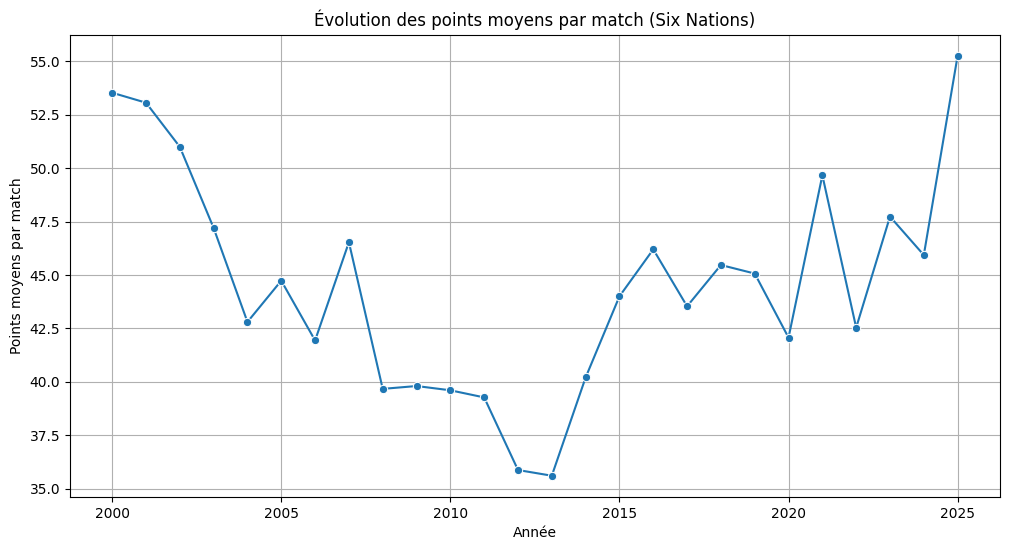

In [159]:
points_per_year = df.groupby('Year')['TotalPoints'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=points_per_year, x='Year', y='TotalPoints', marker='o')
plt.title("Évolution des points moyens par match (Six Nations)")
plt.ylabel("Points moyens par match")
plt.xlabel("Année")
plt.grid(True)
plt.show()


### On observe une augmentation progressive des points moyens par match après 2015, ce qui suggère une tendance vers un jeu plus offensif dans le Six Nations moderne.

# ===============================
## 4. Comparaison par décennie :
# ===============================

In [160]:
def decade(year):
    if year < 2010:
        return "2000s"
    elif year < 2020:
        return "2010s"
    else:
        return "2020s"

df['Decade'] = df['Year'].apply(decade)

print(df.groupby('Decade')['TotalPoints'].mean())


Decade
2000s    46.026667
2010s    41.480000
2020s    47.200000
Name: TotalPoints, dtype: float64


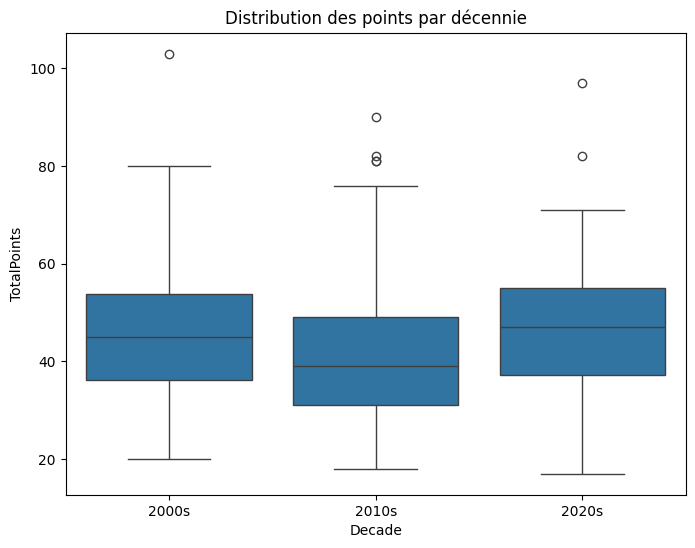

In [161]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Decade', y='TotalPoints')
plt.title("Distribution des points par décennie")
plt.show()


# ===============================
## 5. % de matchs à score élevé
# ===============================

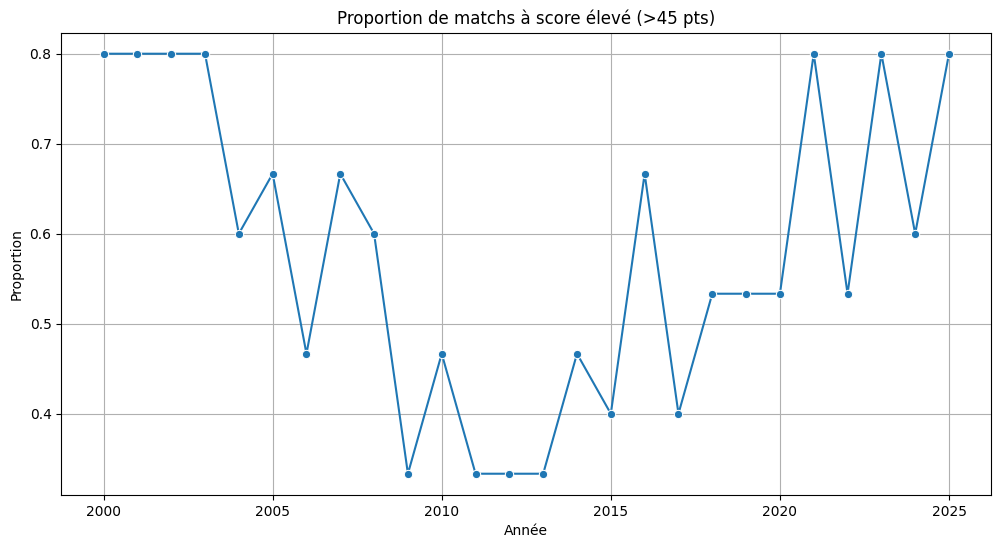

In [162]:
high_score_trend = df.groupby('Year')['HighScoreMatch'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=high_score_trend, x='Year', y='HighScoreMatch', marker='o')
plt.title("Proportion de matchs à score élevé (>45 pts)")
plt.ylabel("Proportion")
plt.xlabel("Année")
plt.grid(True)
plt.show()

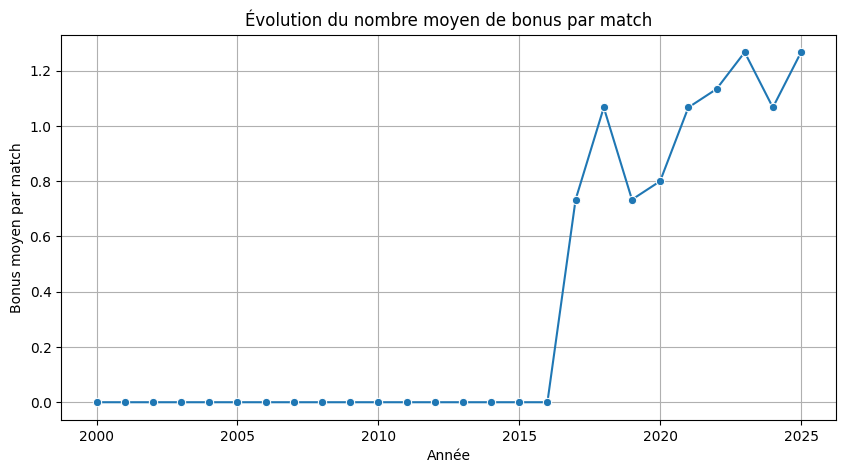

In [163]:
bonus_per_year = df.groupby('Year')['TotalBonus'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=bonus_per_year, x='Year', y='TotalBonus', marker='o')
plt.title("Évolution du nombre moyen de bonus par match")
plt.ylabel("Bonus moyen par match")
plt.xlabel("Année")
plt.grid(True)
plt.show()

##  PARTIE 2 — Les matchs sont-ils plus déséquilibrés ?

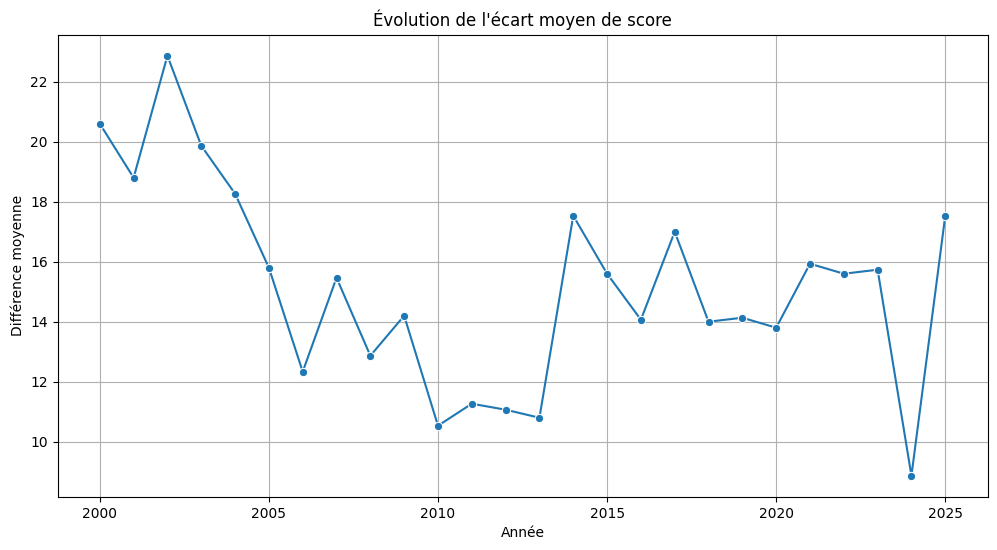

In [164]:
diff_trend = df.groupby('Year')['ScoreDiff'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=diff_trend, x='Year', y='ScoreDiff', marker='o')
plt.title("Évolution de l'écart moyen de score")
plt.ylabel("Différence moyenne")
plt.xlabel("Année")
plt.grid(True)
plt.show()

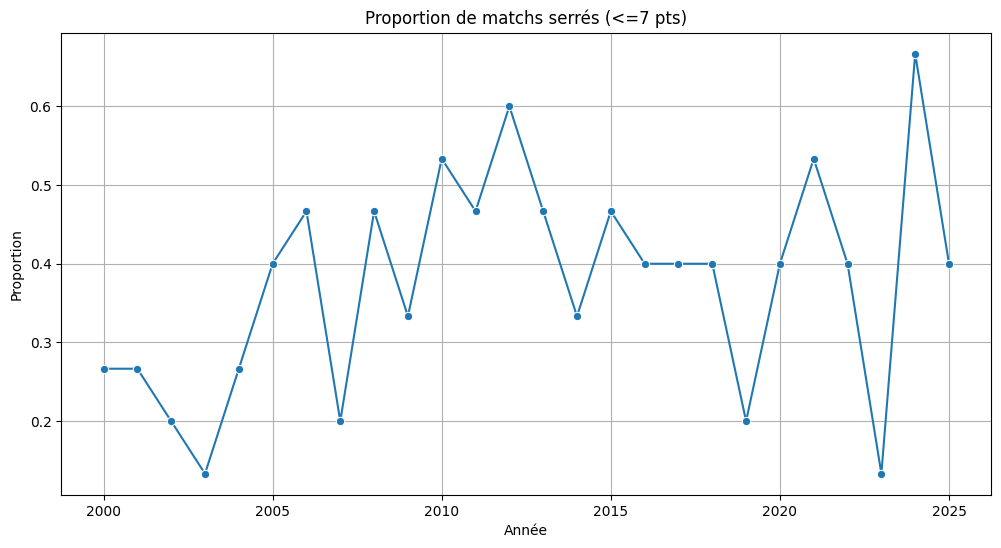

In [165]:
close_trend = df.groupby('Year')['CloseMatch'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=close_trend, x='Year', y='CloseMatch', marker='o')
plt.title("Proportion de matchs serrés (<=7 pts)")
plt.ylabel("Proportion")
plt.xlabel("Année")
plt.grid(True)
plt.show()